# Inverse Problems Exercises: 2024s s04 (non-sc)
https://www.umm.uni-heidelberg.de/miism/

## Notes
* Please **DO NOT** change the name of the `.ipynb` file. 
* Please **DO NOT** import extra packages to solve the tasks. 
* Please put the `.ipynb` file directly into the `.zip` archive without any intermediate folder. 

## Please provide your personal information
* full name (Name): 

YOUR ANSWER HERE

Quang Minh, Ngo

## D07: Singular value decomposition

In [97]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import linalg as LA

In [98]:
file_gaussian = 'file_gaussian.npz'
with np.load(file_gaussian) as data:
    f_true = data['f_true']
    A_psf = data['A_psf']
    list_gn = data['list_gn']

### Imaging model
The imaging model can be represented by
$$
g = h \otimes f_\text{true}
= Af_\text{true}
= \mathcal{F}^{-1}\{ \mathcal{F}\{h\} \mathcal{F}\{f_\text{true}\} \},
$$
$$
g' = g + \epsilon.
$$
* $f_\text{true}$ is the input signal
* $h$ is the point spread function (kernel)
* $\otimes$ is the convolution operator
* $A$ is the Toeplitz matrix of $h$
* $\mathcal{F}$ and $\mathcal{F}^{-1}$ are the Fourier transform operator and inverse Fourier transform operator
* $\epsilon$ is the additive Gaussian noise
* $g$ is the filtered signal
* $g'$ is the noisy signal

### Frobenius norm
Implement the Frobenius norm by definition
$$
\|A\|_\text{F} = \sqrt{\sum_{i}^m\sum_{j}^n |a_{ij}|^2},
$$
where $A$ is an $m \times n$ matrix. When $m = 1$ or $n = 1$, $A$ is a vector.
* Given the matrix $A$
* Calculate the Frobenius norm (`numpy.linalg.norm()` should NOT be used.)
* Implement the function `frobenius_norm()`

In [99]:
def frobenius_norm(mat_A):
    """ Compute the Frobenius norm of the matrix:

    :param mat_A: Input matrix or vector.
    :returns: Frobenius norm.
    """
    # Take the square of each element in the matrix, sum them up, and take the square root of the sum.
    if mat_A.ndim == 1:  # Handle vector case
        return np.sqrt(np.sum(mat_A ** 2))
    sum = 0
    for i in range(len(mat_A)):
        for j in range(len(mat_A[0])):
            sum += mat_A[i][j] ** 2
    return np.sqrt(sum)

In [100]:
# This cell contains hidden tests.


### Condition number of $A$

Calculate the condition number of matrix $A$
$$
\operatorname{cond}_\text{F}(A) = \|A^{-1}\|_\text{F} \|A\|_\text{F}
$$
* Apply the calculation to `A_psf`
* Save $\|A\|_\text{F}$ in the variable `norm_A_psf` (using `frobenius_norm()`)
* Save $\|A^{-1}\|_\text{F}$ in the variable `norm_A_inv` (using `frobenius_norm()`)
* Save $\operatorname{cond}_\text{F}(A)$ in the variable `cond_A_psf` (`numpy.linalg.cond()` should not be used.)

In [101]:
# YOUR CODE HERE
norm_A_psf = frobenius_norm(A_psf)
norm_A_inv = frobenius_norm(LA.inv(A_psf))
cond_A_psf = norm_A_inv * norm_A_psf

In [102]:
# This cell contains tests.

print(cond_A_psf)


659171.3126132708


### Question: Condition number of $A$
Is the inversion of the system with `A_psf` stable?

YOUR ANSWER HERE

The condition number of A_psf is 659171.3126132677 which is very high. This shows that the inversion of the system with A_psf is NOT stable. Consequently, the numerical solutions may be highly sensitve to disturbances of the input data.  

### Singular value decomposition

Calculate the singular value decomposition (SVD) of real matrix $A$
$$
A = USV^T,
$$
where $UU^T = VV^T = I$, and $S$ is a rectangular diagonal matrix with non-negative real numbers on the diagonal. The entries on the diagonal $\operatorname{diag}(S)_i$ are the singular values.

* Apply the calculation to `A_psf` (using `numpy.linalg.svd()`)
* Plot $A$, $U$, $S$ and $V^T$ in order in the subplots of `axs`
* Plot the matrices $A$, $U$, and $V^T$ as grayscale images in the corresponding subplots
* Show the colorbar of the above three subplots
* Plot the singular values $\operatorname{diag}(S)_i$ as a line in the third subplot
* Add proper titles to the subplots of `axs`

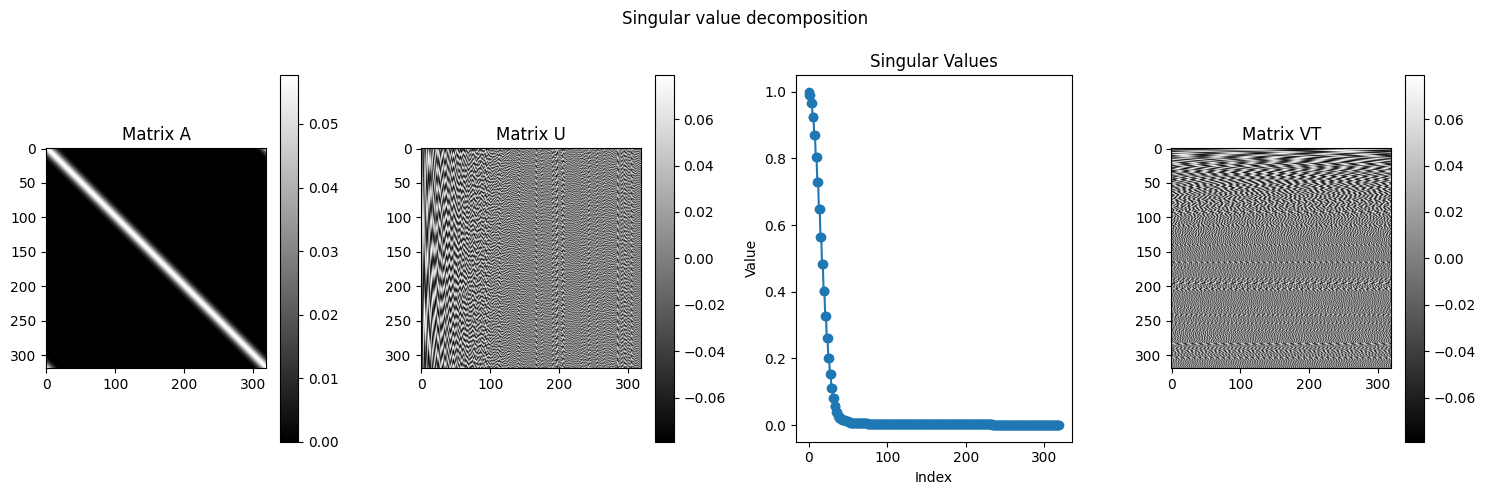

In [103]:
# Perform the singular value decomposition of the matrix A_psf
U, S, VT = LA.svd(A_psf)

# Create the diagonal matrix S
S_matrix = np.diag(S)
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Singular value decomposition')

# Plot A
im1 = axs[0].imshow(A_psf, cmap='gray')
axs[0].set_title('Matrix A')
fig.colorbar(im1, ax=axs[0])

# Plot U
im2 = axs[1].imshow(U, cmap='gray')
axs[1].set_title('Matrix U')
fig.colorbar(im2, ax=axs[1])

# Plot singular values
axs[2].plot(S, marker='o')
axs[2].set_title('Singular Values')
axs[2].set_ylabel('Value')
axs[2].set_xlabel('Index')

# Plot VT
im3 = axs[3].imshow(VT, cmap='gray')
axs[3].set_title('Matrix VT')
fig.colorbar(im3, ax=axs[3])

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust for the suptitle
plt.show()


In [104]:
# This cell contains hidden tests.


### Condition number of $S$

Calculate the condition number of matrix $S$
* Apply the calculation to the $S$ from SVD 
* Save $\|S\|_\text{F}$ in the variable `norm_S_psf` (using `frobenius_norm()`)
* Save $\|S^{-1}\|_\text{F}$ in the variable `norm_S_inv` (using `frobenius_norm()`)
* Save $\operatorname{cond}_\text{F}(S)$ in the variable `cond_S_psf` (`numpy.linalg.cond()` should not be used.)

In [105]:
# YOUR CODE HERE
# Compute the S
norm_S_psf = frobenius_norm(S)
S_inv = 1 / S
norm_S_inv = frobenius_norm(S_inv)
cond_S_psf = norm_S_inv * norm_S_psf

In [106]:
# This cell contains tests.

print(cond_S_psf)


659171.3126122751


### Question: Condition number of $S$
Is the equation $\operatorname{cond}_\text{F}(A) = \operatorname{cond}_\text{F}(S)$ valid? Why?

YOUR ANSWER HERE

The equation $\operatorname{cond}_\text{F}(A) = \operatorname{cond}_\text{F}(S)$ is valid. 

Since U, V are orthogonal and S is diagonal, the Frobenius norm a matrix becomes invariant then $$\|A\|_\text{F}  = \|USV^T\|_\text{F} = \|S\|_\text{F}$$

Therefore, $\operatorname{cond}_\text{F}(A) = \|A^{-1}\|_\text{F} \|A\|_\text{F} = \|S^{-1}\|_\text{F} \|S\|_\text{F} = \operatorname{cond}_\text{F}(S)$

### Truncated singular values

$S_t$ contains the truncated singular values as
$$
\operatorname{diag}(S_t)_i = 
\begin{cases}
    \operatorname{diag}(S)_i & \operatorname{diag}(S)_i \geq \text{TH}\\
    1 & \text{otherwise} \\
\end{cases},
$$
i.e. to set the singular values in $S$ less than the threshold $\text{TH}$ to $1$.

* Set $\text{TH}$ with $2\% \cdot \max(\operatorname{diag}(S)_i)$, $10\% \cdot \max(\operatorname{diag}(S)_i)$, $50\% \cdot \max(\operatorname{diag}(S)_i)$, respectively
* Generate $S_t$
* Save $A_t = U S_t V^T$ in the variable `list_A_tsvd` (as `list` of `numpy.array`)
* Save $\operatorname{cond}_\text{F}(A_t)$ in the variable `list_cond_A_tsvd` (`numpy.linalg.cond()` should not be used.)

In [107]:
# YOUR CODE HERE
list_A_tsvd = []
list_cond_A_tsvd = []
max_S = np.max(S)
TH = [0.02 * max_S, 0.1 * max_S, 0.5 * max_S]

for th in TH:
    # Calculate S_t
    # Compare the singular values with the threshold
    S_t = np.diag([s if s >= th else 1 for s in S])
    # Calculate A_t = U * S_t * VT
    A_t = np.dot(np.dot(U, S_t), VT)
    list_A_tsvd.append(A_t)
    
    # Calculate the condition number of A_t
    norm_A_t = frobenius_norm(A_t)
    norm_A_inv_t = frobenius_norm(LA.inv(A_t))
    cond_A_t = norm_A_inv_t * norm_A_t
    list_cond_A_tsvd.append(cond_A_t)

In [108]:
# This cell contains tests.

print(list_cond_A_tsvd)


[1700.050707324662, 453.90045418073595, 322.8639779194677]


### Reconstruction

Reconstruct the signal by
$$
\tilde{f} = A_t^{-1} g'
$$
* Apply this operation to the noisy signals in `list_gn`
* Return the outputs with different $A_t$ in `list_A_tsvd`
* Save the outputs in the variable `list_f_tsvd` (as `list` of `numpy.array`)

Display the result
* Plot the outputs in `list_f_tsvd` in the same order of the noisy signals in the subplots of `axs`
* Show the cases of the same noisy signal in the same subplot column
* Show the cases with the same $A_t$ in the same subplot row
* Plot the corresponding noisy signal in each subplot (after the filter output)
* Plot the input signal `f_true` in each subplot (after the noisy signal)
* Show the legend in each subplot
* Show the case information in the titles to the subplots

(320, 320) 3


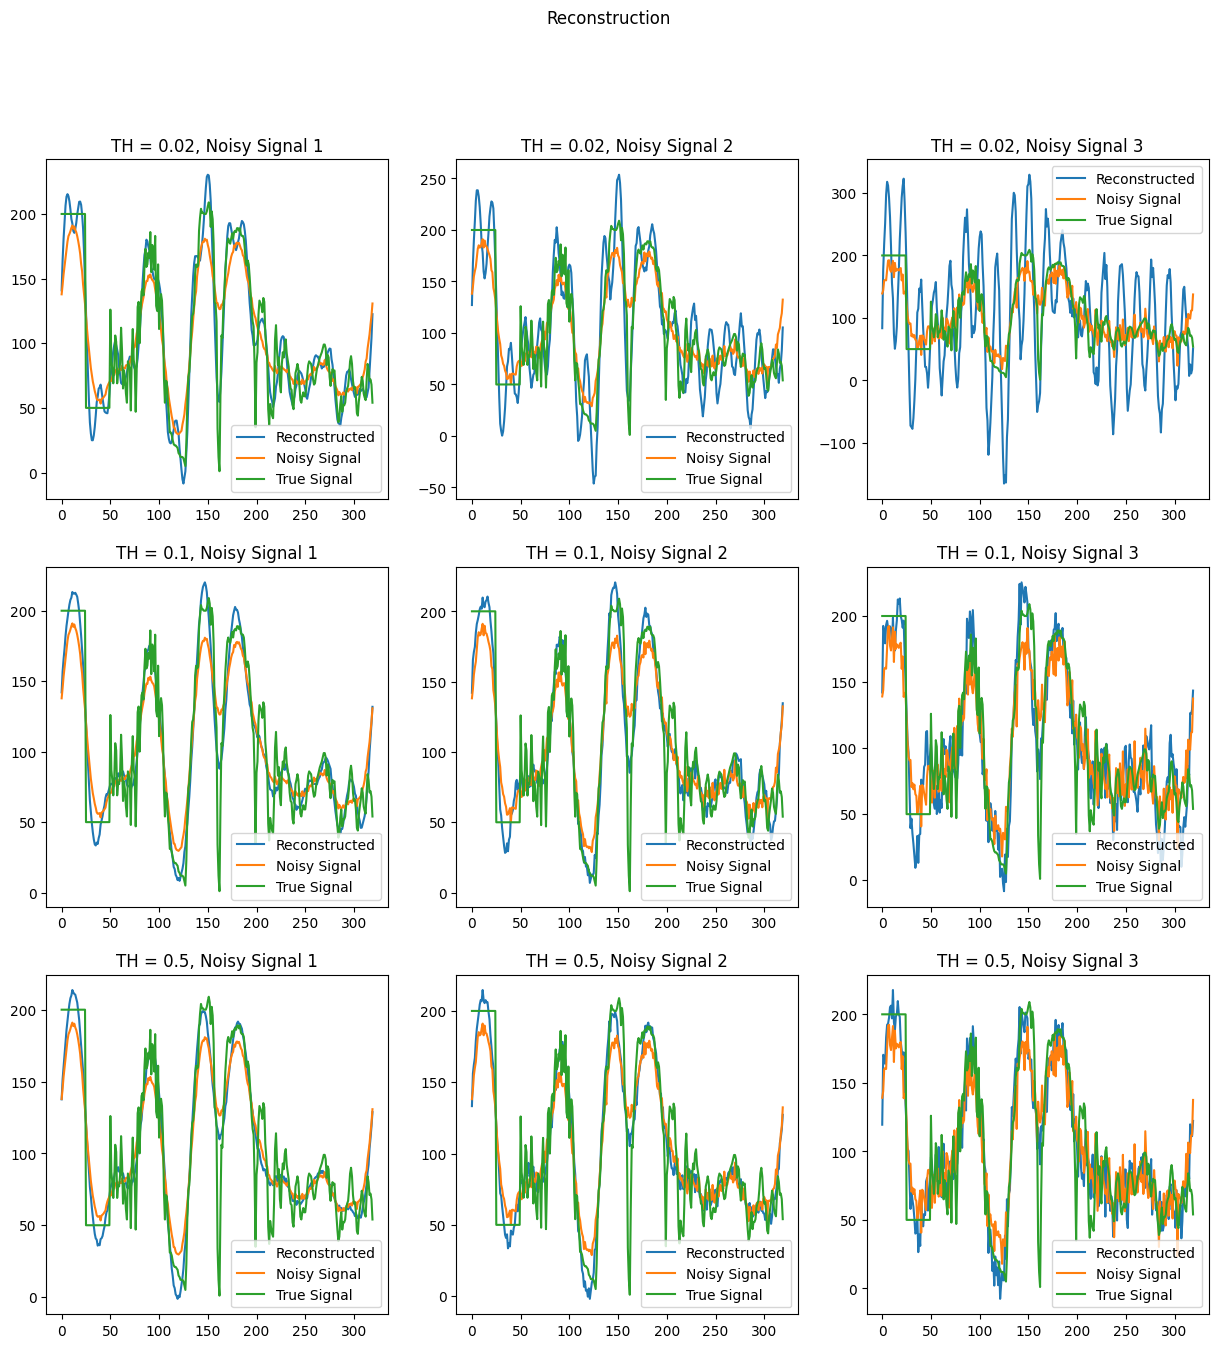

In [109]:
# Calculate the reconstructed signals
list_f_tsvd = []

for At in list_A_tsvd:
    At_inv = np.linalg.inv(At)
    list_f_tsvd.append([np.dot(At_inv, g) for g in list_gn])
print(list_A_tsvd[0].shape, len(list_A_tsvd))
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Reconstruction')

for i, f_tsvd_list in enumerate(list_f_tsvd):
    for j, f_tsvd in enumerate(f_tsvd_list):
        axs[i, j].plot(f_tsvd, label='Reconstructed')
        axs[i, j].plot(list_gn[j], label='Noisy Signal')
        axs[i, j].plot(f_true, label='True Signal')
        axs[i, j].set_title(f'TH = {round(TH[i],3)}, Noisy Signal {j+1}')
        axs[i, j].legend()
        
plt.show()


In [110]:
# This cell contains hidden tests.


### Question: Truncated singular values

Describe the visual effect on the reconstruction result considering the influence of $\text{TH}$.

YOUR ANSWER HERE

-   Low Threshold (TH = 2%):
    +   With a low threshold, most singular values are retained which means a reconstructed matrix At is very similar to the original matrix A. The condition number of At is relatively high, indicating that the matrix is still quite sensitive to perturbations.
Generally, the reconstruction looks similar to the the original.
-   Moderate Threshold (TH = 10%):
    +   Less necessary singular values are removed or replaced. The primary features of the original data are kept in matrix At but some finer details and noise are lost. The condition number of At decreases, showing an improvement in numerical stability.
Generally, the reconstruction will be smoother with less noise, featuring the main structures of the data more clearly.

-   High Threshold (TH = 50%):
    +   Many singular values are truncated, only the most significant components remain. The matrix At becomes a simplified version of the original, highlighting major features while removing much of the detail and noise. Since condition number At is significantly declined, there is a much better numerical stability.
Generally, the reconstruction result will be a highly smoothed version of the original, with major structures intact but fine details and noise removed.